In [1]:
from pysat.card import *
from pysat.solvers import Glucose42

In [2]:
n = 10

variables_dict={}
var_count=1

In [3]:
# Create variables names
def create_grid_variable(name):
    global var_count
    
    variables = []
    for i in range(n):
        for j in range(n):
            var = f"{name}_({i},{j})"
            variables.append(var)
            variables_dict[var] = var_count
            var_count += 1
    
    return variables

In [4]:
# Create set of clause to tell only one variable should be true in the list
def get_unique_clause(variables):
    global var_count
    clauses = []
    places = [variables_dict[var] for var in variables]
    cnf = CardEnc.equals(lits=places, encoding=EncType.pairwise, top_id=var_count)
    
    return cnf.clauses

In [5]:
def get_reachable(x, y):
    moves = [
        (2, 1), (1, 2), (-1, 2), (-2, 1),
        (-2, -1), (-1, -2), (1, -2), (2, -1)
    ]
    
    valid_pos = []
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < n and 0 <= ny < n:
            valid_pos.append((nx, ny))
    
    return valid_pos

In [6]:
def get_diff_clause(step1, step2):
    clauses = []
    
    for i in range(n):
        for j in range(n):
            reachables = get_reachable(i, j)

            c_var = variables_dict[f"{step1}_({i},{j})"]
            cn_var = [variables_dict[f"{step2}_({x},{y})"] for (x,y) in reachables]
            
            clauses.append([-c_var] + cn_var)

    return clauses

In [7]:
clauses = []

for i in range(n*n):
    C = create_grid_variable(f"C_{i}")
    clauses += get_unique_clause(C)

for l in range(n * n):
    used = []
    i = l//n
    j = l%n
    
    for k in range(n*n):
        used.append(f"C_{k}_({i},{j})")
 
    clauses += get_unique_clause(used)

for i in range(n*n-1):
    clauses += get_diff_clause(f"C_{i}", f"C_{i+1}")

In [8]:
g = Glucose42()

for clause in clauses:
    g.add_clause(clause)

def get_name(num):
    for key, val in variables_dict.items():
        if val==num:
            return key

print(f"Number of clauses : { len(clauses) }")
print(f"Number of litterals : { var_count-1 }")
g.solve()

Number of clauses : 1000100
Number of litterals : 10000


True

In [19]:
final_res = [[0 for i in range(n)] for j in range(n)]
for i in range(n**4):
    v = g.get_model()[i]
    if v > 0:
        pos = i%(n*n)
        final_res[(pos//n)][pos%n] = i//(n*n)

In [20]:
for i in range(n):
    for j in range(n):
        print(f"{final_res[i][j]:03d}", end=" ")
    print("")

026 095 042 011 078 097 040 009 082 099 
043 012 027 096 041 010 077 098 039 008 
094 025 044 079 028 085 038 081 076 083 
045 048 013 024 037 080 029 084 007 000 
014 093 046 035 086 005 060 001 030 075 
047 088 049 004 023 036 033 006 059 062 
092 015 068 087 034 055 002 061 074 031 
089 050 091 054 003 022 019 032 063 058 
016 069 052 067 018 071 056 065 020 073 
051 090 017 070 053 066 021 072 057 064 


In [23]:
### Pretty solution printing code from ChatGPT

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

def display_knight_tour_matrix(final_res):
    n = len(final_res)
    fig, ax = plt.subplots(figsize=(6,6))

    # Draw chessboard pattern
    board = np.zeros((n,n,3))
    light = np.array([240, 217, 181]) / 255
    dark  = np.array([181, 136,  99]) / 255
    for r in range(n):
        for c in range(n):
            board[r, c] = light if (r+c)%2==0 else dark

    ax.imshow(board, extent=[0,n,n,0])

    # Create inverse lookup: step -> (x,y)
    step_to_pos = {}
    for r in range(n):
        for c in range(n):
            step = final_res[r][c]
            step_to_pos[step] = (c, r)

    # Plot numbers on squares
    for step, (x,y) in step_to_pos.items():
        ax.text(x+0.5, y+0.5, str(step), color="black",
                ha="center", va="center", fontsize=8, weight='bold')

    # Draw arrows between successive steps
    for step in range(0, n*n - 1):
        x0, y0 = step_to_pos[step]
        x1, y1 = step_to_pos[step+1]
        arrow = FancyArrowPatch((x0+0.5, y0+0.5), (x1+0.5, y1+0.5),
                                mutation_scale=10, linewidth=1,
                                arrowstyle='-|>', color="blue")
        ax.add_patch(arrow)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, n)
    ax.set_ylim(n, 0)
    plt.title("Knight's Tour")
    plt.show()

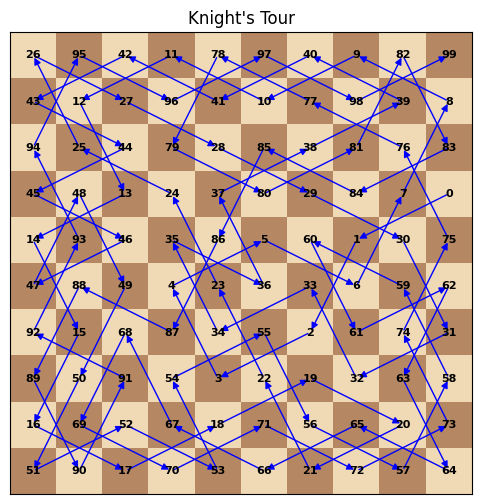

In [24]:
display_knight_tour_matrix(final_res)